<a href="https://colab.research.google.com/github/okazevedo90/CUNY_GITHUB_submissions/blob/main/DATA602_Asignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [75]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [76]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [97]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())

y = iris.target
target_names = iris.target_names.tolist()
print(f"Target Names: {target_names}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Target Names: ['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [98]:
def knn_iris_predict_new_observations(new_observations, neighbors=5):
  # Fit the classifier to the training data
  knn = KNN(n_neighbors=neighbors)
  knn.fit(df.values, y)

  # Predict the labels for the X_new
  preds = knn.predict(new_observations)

  # Convert encoded labels to string target names
  decoded_preds = [target_names[p] for p in preds]
  return decoded_preds


new_observations = [
    [5.1, 3.5, 1.4, 0.2],
    [6.0, 3.0, 4.8, 1.8]
  ]

# Print the predictions
y_pred = knn_iris_predict_new_observations(new_observations)
print("Predictions: {}".format(y_pred))


Predictions: ['setosa', 'virginica']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [99]:
def knn_iris_accuracy(split: float, neighbors: int, seed: int):
  """
  split: float between 0 and 1 (percentage of data used for test set)
  neighbors: int, number of neighbors for kNN
  seed: int, random seed for train_test_split
  """
  # Split into training and test sets
  X_train, X_test, y_train, y_test = tts(df.values, y, test_size=split, random_state=seed, stratify=y)
  knn = KNN(n_neighbors=neighbors)

  # Fit the classifier to the training data
  knn.fit(X_train, y_train)

  # Compute accuracy
  accuracy = knn.score(X_test, y_test)

  return accuracy


print(f"Accurary: {knn_iris_accuracy(split=0.25, neighbors=5, seed=50)}")

Accurary: 0.9736842105263158


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [100]:
X_train, X_test, y_train, y_test = tts(df.values, y, test_size=0.2, random_state=45, stratify=y)

In [101]:
# Create neighbors
neighbors = np.arange(1, 31)
train_accuracies = []
test_accuracies = []

for neighbor in neighbors:

  # Set up a KNN Classifier
  knn = KNN(n_neighbors=neighbor)

  # Fit the model
  knn.fit(X_train, y_train)

  # Compute training & test accuracy
  train_accuracies.append(knn.score(X_train, y_train))
  test_accuracies.append(knn.score(X_test, y_test))


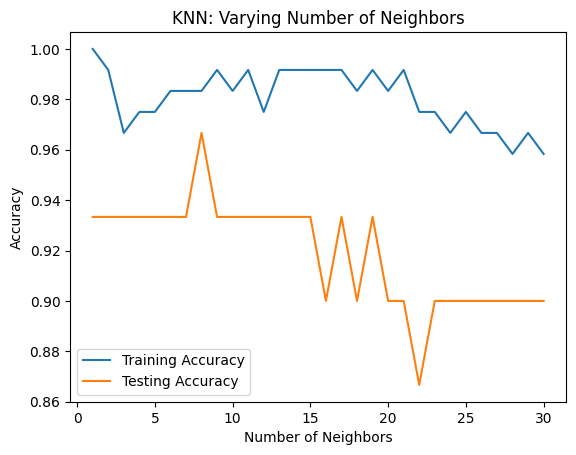

In [102]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies, label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies, label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()